In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A=pd.read_csv("C:/Users/mitta/OneDrive/Desktop/ETLHive/Data/Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [2]:
pd.set_option("display.max_columns" , 30)
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
A=A.drop(labels=["id" , "Make" , "Model"], axis=1)
A.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [4]:
from PM6_wd import replacer
replacer(A)

In [5]:
A.isna().sum()

Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

In [6]:
from PM6_wd import catcon
cat,con = catcon(A)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xcon=pd.DataFrame(ss.fit_transform(A[con]), columns=con)
Xcon

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,-0.627055
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.830208
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,0.514894
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,0.566026
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000,1.511968
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228,-0.149822
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643,-0.448092
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822


In [8]:
out=[]
for i in Xcon:
   out.extend(list(Xcon[(Xcon[i]>3) | (Xcon[i]<-3)].index))
out
import numpy as np
outliers=list(np.unique(out))
outliers

[16, 38, 41, 47, 58, 59]

In [9]:
A=A.drop(index=outliers , axis=0)
A.shape

(87, 25)

In [10]:
A.index=range(0,87)

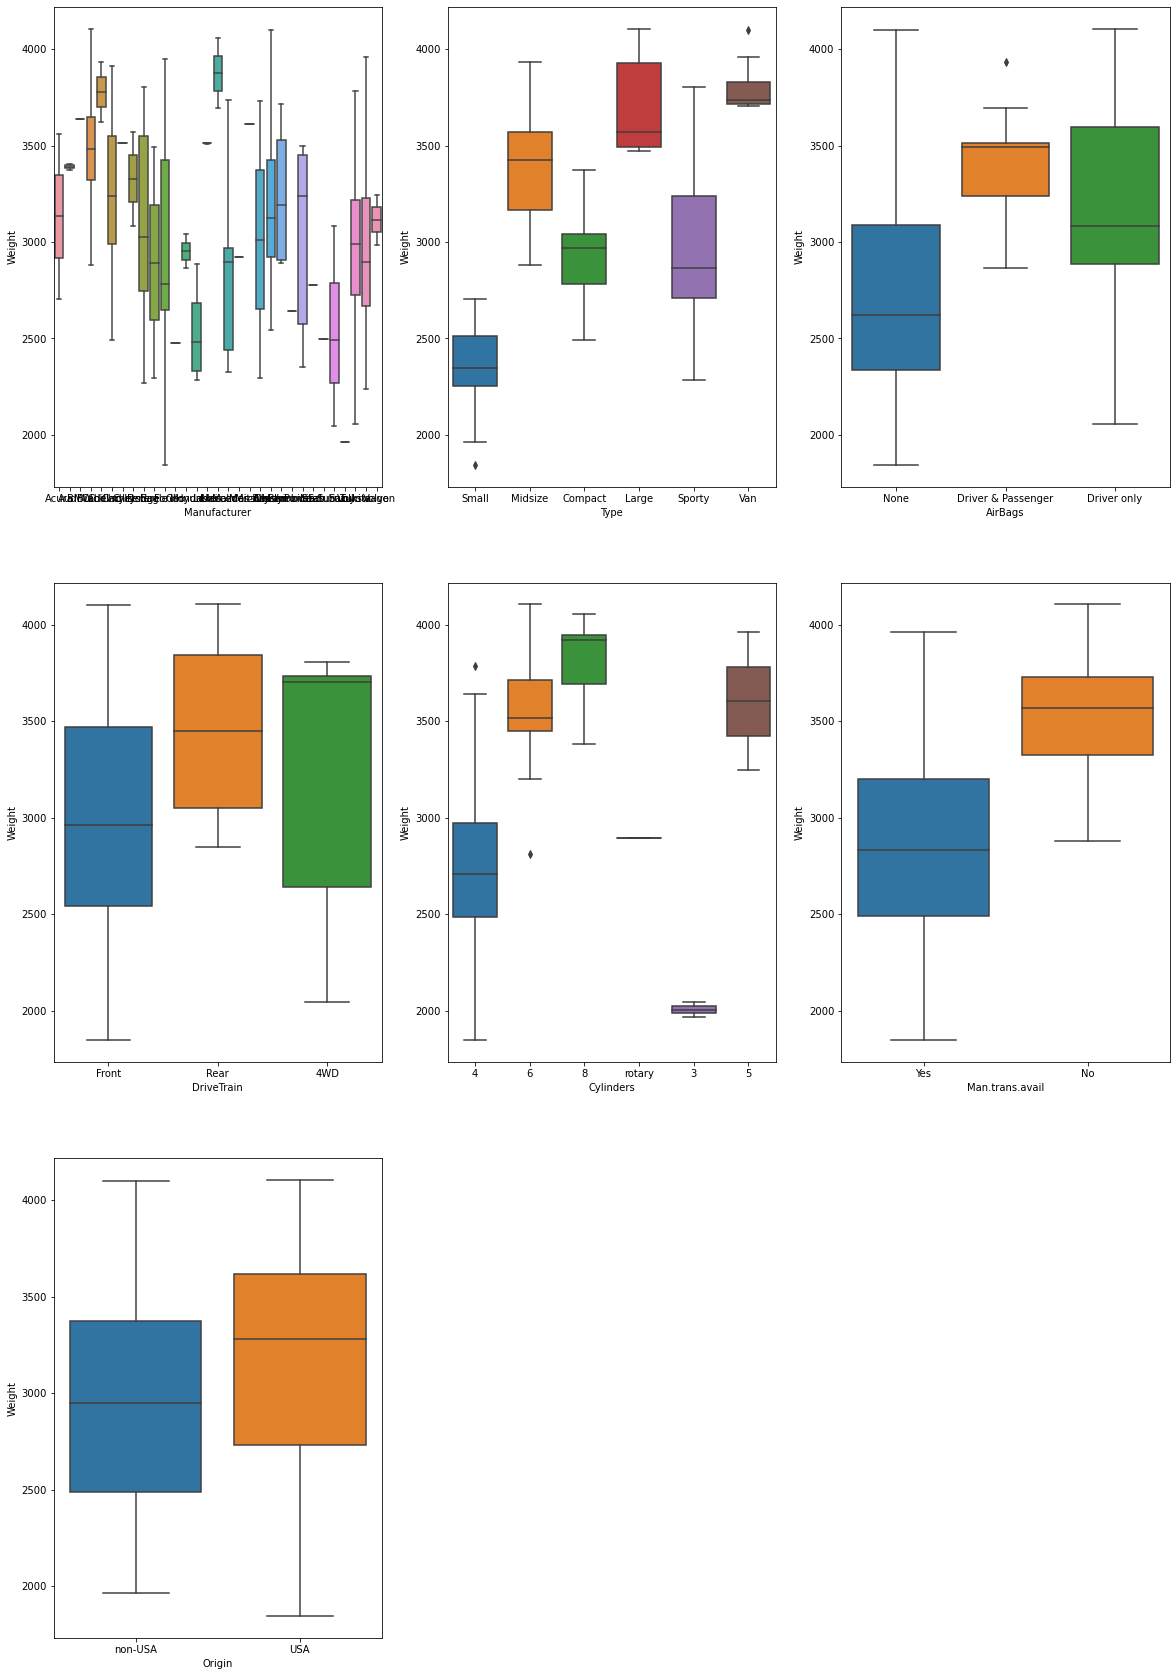

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
x=1
plt.figure(figsize=(20,30))
for i in cat:
    plt.subplot(3,3,x)
    sb.boxplot(A[i],A["Weight"])
    x=x+1


In [12]:
q=A.corr()["Weight"]
q

Min.Price             0.677071
Price                 0.689606
Max.Price             0.672457
MPG.city             -0.872984
MPG.highway          -0.821412
EngineSize            0.825492
Horsepower            0.716912
RPM                  -0.424413
Rev.per.mile         -0.710466
Fuel.tank.capacity    0.891269
Passengers            0.524746
Length                0.789172
Wheelbase             0.868891
Width                 0.873592
Turn.circle           0.773158
Rear.seat.room        0.526896
Luggage.room          0.561826
Weight                1.000000
Name: Weight, dtype: float64

In [13]:
q1 = list(q[(q>0.7) & (q!=1) | (q<-0.7)].index)
q1

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle']

In [14]:
cat.remove("Origin")
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail']

In [15]:
Xcols= q1 + cat
Xcols

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail']

# Define X and Y

In [16]:
Y=A["Weight"]
X=A[Xcols]

In [22]:
pd.set_option("display.max_columns" , 70)

In [26]:
Xnew.shape

(87, 61)

# Adding columns as per forward selection

In [30]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity"]]
from sklearn .model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2, random_state=21)
ytest

,Weight
36,3950
47,4055
51,3735
22,2670
3,3405
24,3705
10,3935
23,2970
13,3240
40,2345


# Model1

In [34]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain , ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error, explained_variance_score
adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)
adj , bias , var

(0.865082348915397, 213.01226663902443, 199.60236598278718)

# Model2

In [39]:
Xcon=Xcon.drop(index=outliers , axis=0)
Xcon.shape

(87, 18)

In [44]:
Y=A[["Weight"]]
X=Xcon[["Fuel.tank.capacity" , "Width"]]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)
model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)


adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)
adj, bias, var

(0.9417341538580248, 167.4956410143171, 133.06260383628535)

# Model3

In [47]:
Y=A[["Weight"]]
X=Xcon[["Fuel.tank.capacity","Width","RPM"]]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 , random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)
adj,bias,var


(0.9316958984317716, 166.12340466599113, 137.12490950803618)

# Model4

In [51]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","Type"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)
Xnew=xcat.join(xcon)
Xnew

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2 , random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj= explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)
adj,bias,var

(0.9404017961168187, 140.69126681729688, 131.53149815757286)

# Model5

In [57]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","Type" , "MPG.city"]]

cat=[]
con=[]

for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

xcat=pd.get_dummies(xcat)
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns = con)
Xnew=xcat.join(xcon)

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2 , random_state=21)

model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9394206752374241, 126.14565264280247, 129.8180409464301)

# Model6

In [65]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","MPG.highway"]]

X=pd.DataFrame(ss.fit_transform(X), columns =X.columns )


xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)
adj,bias,var

(0.9369917848239064, 145.46378149536417, 129.52600839312947)

# Model7

In [67]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","Type","MPG.highway"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
        
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)
xcat=pd.get_dummies(X[cat])
Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2, random_state=21)

model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj, bias, var

(0.9315044277391471, 124.82166309973539, 126.62367270829883)

# Model8

In [71]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","Wheelbase"]]

X=pd.DataFrame(ss.fit_transform(X), columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 , random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var


(0.9700251382342047, 145.68259022730646, 104.11160734516642)

# Model9

In [73]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width","Wheelbase" , "EngineSize"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.966762192127689, 139.59323082246956, 100.37972544936399)

# Model10

In [78]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "EngineSize"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.966762192127689, 139.59323082246956, 100.37972544936399)

# Model11

In [79]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length"  ]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9700512542445877, 145.66142501341028, 104.83915417760845)

# Model12

In [80]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9744733785974582, 143.23688937801583, 92.55089266735915)

# Model14

In [81]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Turn.circle"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9727997540288978, 142.08827274492765, 95.41233956420155)

# Model15

In [82]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Horsepower"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9705744598806882, 131.08733209475636, 101.32494279418455)

# Model16

In [85]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Price"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9587692843774195, 133.5965235942277, 117.2770074206226)

# Model17

In [86]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Min.Price"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9665023923638036, 137.56851954071138, 110.29557557938364)

# Model18

In [87]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Max.Price"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9565585362312, 131.65945601555038, 116.40045138477818)

# Model19

In [93]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9785368901594502, 137.50898311652088, 90.80656881892132)

# Model20

In [103]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Rear.seat.room", "Luggage.room"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9785013127909912, 137.5033666790695, 90.96590483753982)

# Model21

In [97]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room", "Passengers"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9770513213552687, 138.23386585590637, 88.89408069081881)

# Model22

In [101]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "RPM"]]

X=pd.DataFrame(ss.fit_transform(X) , columns=X.columns)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2 ,random_state=21)

model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias,var

(0.9748318933199434, 138.06048156716443, 91.82338775015128)

# Model23

In [105]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "Manufacturer"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)

Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias, var

(-2.255895289612921e+24, 85.4448318619659, 232181499601550.34)

# Model24

In [107]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "AirBags"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)

Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias, var

(0.9778553648384984, 136.58662361344798, 88.68895448259912)

# Model25

In [109]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "AirBags" , "DriveTrain"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)

Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias, var

(0.9751872349972129, 136.36091920368887, 103.33930204954305)

# Model26

In [110]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "AirBags" , "Cylinders"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)

Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias, var

(0.9420943810236208, 126.69561170795461, 141.91567949515812)

# Model27

In [111]:
Y=A[["Weight"]]
X=A[["Fuel.tank.capacity","Width", "Wheelbase", "Length" , "Rev.per.mile" , "Luggage.room",  "AirBags" , "Man.trans.avail"]]

cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
xcat=pd.get_dummies(X[cat])
xcon=pd.DataFrame(ss.fit_transform(X[con]) , columns=con)

Xnew=xcat.join(xcon)
Xnew.head()

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
model=lm.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

adj=explained_variance_score(ytest,ts_pred)
bias=mean_absolute_error(ytrain,tr_pred)
var=mean_absolute_error(ytest,ts_pred)

adj,bias, var

(0.9788918518375687, 136.74445766920638, 87.82369565378288)